# IMDB Sentiment Analysis using LSTM

## Importing libraries

In [ ]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from keras.layers import Dense, LSTM,Embedding, SpatialDropout1D
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the dataset

In [ ]:
file_path = '/content/drive/My Drive/movie_reviews.csv'
data = pd.read_csv(file_path)

In [ ]:
# columns of the dataset
data.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
# shape of the data
data.shape

(50000, 2)

In [ ]:
# 5 elements from the top
data.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


## Text Preprocessing

In [ ]:
import string
# removing the html tags
def clean_html(text):
    clean=re.compile('<.*?>')
    cleantext=re.sub(clean,'',text)
    return cleantext

# first round of cleaning
def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

# second round of cleaning
def clean_text2(text):
    text=re.sub('[''"",,,]','',text)
    text=re.sub('\n','',text)
    return text

cleaned_html=lambda x:clean_html(x)
cleaned1=lambda x:clean_text1(x)
cleaned2=lambda x:clean_text2(x)

data['review']=pd.DataFrame(data.review.apply(cleaned_html))
data['review']=pd.DataFrame(data.review.apply(cleaned1))
data['review']=pd.DataFrame(data.review.apply(cleaned2))

## Defining the model

In [ ]:
max_features=5000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['review'].values)
X = tokenizer.texts_to_sequences(data['review'].values)
X = pad_sequences(X,maxlen=600)

In [ ]:
embed_dim = 128
lstm_out = 128

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 128)          640000    
                                                                 
 spatial_dropout1d (Spatial  (None, 600, 128)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 771713 (2.94 MB)
Trainable params: 771713 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Split the dataset

In [ ]:
Y=pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = tts(X,Y, test_size = 0.2, random_state = 42)

## Running the model

In [ ]:
batch_size = 64
model.fit(X_train, Y_train, epochs = 16, batch_size=batch_size,validation_data=(X_test,Y_test),verbose = True)

Epoch 1/10
625/625 [==============================] - 1501s 2s/step - loss: 0.4135 - accuracy: 0.8081 - val_loss: 0.3553 - val_accuracy: 0.8551
Epoch 2/10
625/625 [==============================] - 1474s 2s/step - loss: 0.2907 - accuracy: 0.8827 - val_loss: 0.2964 - val_accuracy: 0.8784
Epoch 3/10
625/625 [==============================] - 1470s 2s/step - loss: 0.2481 - accuracy: 0.9024 - val_loss: 0.2830 - val_accuracy: 0.8866
Epoch 4/10
625/625 [==============================] - 1477s 2s/step - loss: 0.2335 - accuracy: 0.9061 - val_loss: 0.2851 - val_accuracy: 0.8829
Epoch 5/10
625/625 [==============================] - 1510s 2s/step - loss: 0.2252 - accuracy: 0.9118 - val_loss: 0.3054 - val_accuracy: 0.8844
Epoch 6/10
625/625 [==============================] - 1476s 2s/step - loss: 0.1926 - accuracy: 0.9271 - val_loss: 0.3519 - val_accuracy: 0.8859
Epoch 7/10
625/625 [==============================] - 1461s 2s/step - loss: 0.1994 - accuracy: 0.9223 - val_loss: 0.3084 - val_accuracy:

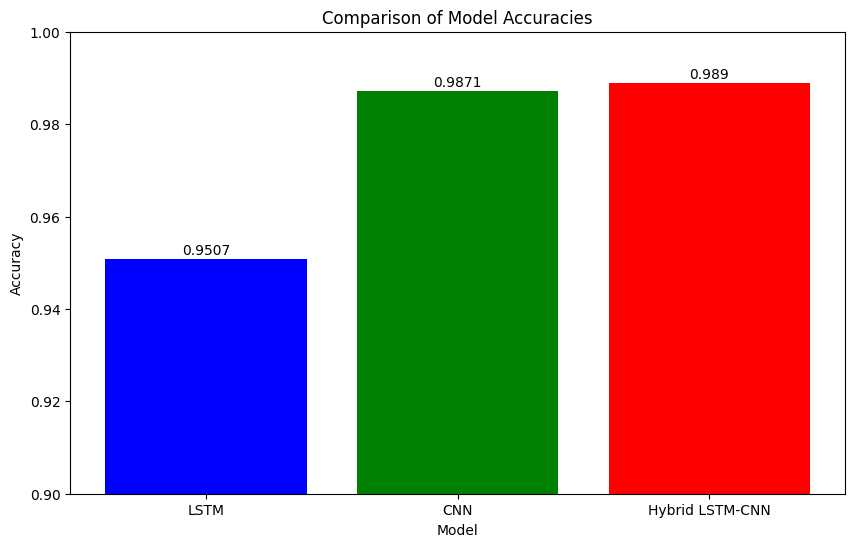

In [ ]:
import matplotlib.pyplot as plt

# Model accuracies
models = ['LSTM', 'CNN', 'Hybrid LSTM-CNN']
accuracies = [0.9507, 0.9871, 0.9890]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.9, 1.0)  # Set y-axis limits for better comparison

# Adding accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.001, str(v), color='black', ha='center')

# Display the plot
plt.show()


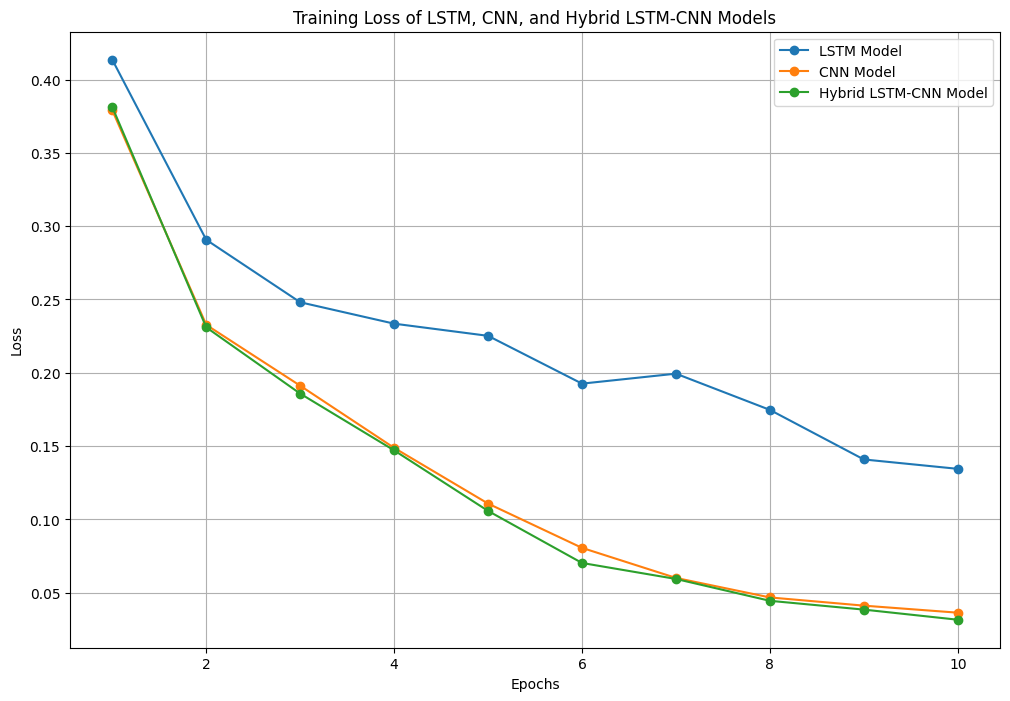

In [ ]:
import matplotlib.pyplot as plt

# Data for LSTM model
epochs_lstm = list(range(1, 11))
loss_lstm = [0.4135, 0.2907, 0.2481, 0.2335, 0.2252, 0.1926, 0.1994, 0.1747, 0.1409, 0.1345]

# Data for CNN model
epochs_cnn = list(range(1, 11))
loss_cnn = [0.3790, 0.2327, 0.1912, 0.1488, 0.1108, 0.0806, 0.0601, 0.0468, 0.0412, 0.0364]

# Data for Hybrid LSTM-CNN model
epochs_hybrid = list(range(1, 11))
loss_hybrid = [0.3812, 0.2310, 0.1858, 0.1471, 0.1058, 0.0703, 0.0594, 0.0445, 0.0385, 0.0316]

# Plotting the training loss
plt.figure(figsize=(12, 8))
plt.plot(epochs_lstm, loss_lstm, label='LSTM Model', marker='o')
plt.plot(epochs_cnn, loss_cnn, label='CNN Model', marker='o')
plt.plot(epochs_hybrid, loss_hybrid, label='Hybrid LSTM-CNN Model', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss of LSTM, CNN, and Hybrid LSTM-CNN Models')
plt.legend()
plt.grid(True)
plt.show()
